## BVPs, BCs, nonlinear, nonuniform grids


### Boundary conditions
* Dirichlet conditions are straightforward
    * Unknowns are interior points. Points near the boundaries are written in terms of the boundaries.
* Neumann and Robin conditions:
    * $y^{\prime} = \alpha$ is given at the boundary (or $y^{\prime} + \beta y = \alpha$ for Robin).
    * Interior cells need $y$ on the boundary, not $y^{\prime}$.


#### Two Approaches
**Approach 1. Ghost Cell Method** Include the boundary point in the list of unknowns (like interior points).
* Discretize the boundary point exactly as if it was an interior point.
* For central differences, this will reference one point past the boundary.
    ```        
                \\|
                \\|
                \\|
         *        *         *          *
        i-1     \\|i       i+1       
        -1      \\|0        1          2
                \\|
                \\|
    ```


* Use the BC $y^{\prime}=\alpha$ as an equation for the new unknown $y_{-1}$.
    $$y_0^{\prime} = \alpha \rightarrow \frac{y_1-y_{-1}}{2\Delta x} = \alpha \rightarrow$$
    <font color='blue'>
    $$y_{-1}=y_{1} - 2\Delta x\alpha.$$
    </font>
* Substitute this equation in for $y_{i-1} = y_{-1}$ appearing in the finite difference equation (FDE) at point $i=0$. The first two equations below are the FDE at $i=0$. The last equation has the substitution for $y_{-1}$:
    $$l_iy_{i-1} + a_iy_i + u_{i}y_{i+1} = F_i$$
    $$\mbox{or,}$$
    $$l_0y_{-1}  + a_0y_0 + u_0y_{1} = F_0, $$
    $$\rightarrow a_0y_0 + (l_0+u_0)y_1 = F_0 + 2\Delta x\alpha l_0. $$
* That is, the unknown $y_{-1}$ is in terms of $y_1$, so when we substitute it into the FDE at $i=0$, the coefficient of $y_1$ and the RHS are modified in the $i=0$ equation. 
* This is called the **Ghost Cell Method** since a false or *ghost* point arises, which is then handled with the boundary condition equation.
    



* **Advantages**
    * Solves directly for the unknown boundary value.
    * Uses a uniform stencil (central difference everywhere, even at the boundaries.

* **Disadvantage**
    * Higher order $y^{\prime\prime\prime}$ or higher order FDA can lead to multiple outside points, which can be awkward.
    * Remedy this using one-sided differences.

**Method 2** Don't include the boundary point in the list of unkowns. 

    ```        
    \\|
    \\|
    \\|
      *         *          *        *  
    \\|i-1      i         i+1
    \\|-1       0          1        2  
    \\|
    ```
* The first unknown point is $i=0$.
* The FDE at this point is in terms of point $i-1=-1$


* Use the Boundary condition at $i-1$ with a one-sided difference to get another equation to write $y_{-1}$ in terms of the interior points we are solving for ($y_0$, $y_{1}$, etc.)
* At the left side for the $i=0$ FDE (which has a $y_{-1}$ term):
    * Write a one sided difference for $y^{\prime}_{-1}$.
    $$y^{\prime}_{-1} = \alpha = \frac{-\frac{3}{2}y_{-1} + 2y_0 - \frac{1}{2}y_1}{\Delta x}.$$
    * Solve for $y_{-1}$:
        <font color='blue'>
        $$ y_{-1} = \frac{\alpha\Delta x - 2y_0 + \frac{1}{2}y_{1}}{-3/2}.$$
        </font>
    * The FDE at point $i=0$ is 
        $$l_0y_{-1} + a_0y_0 + u_0y_1 = F_0.$$
    * Insert the above BC equation for $y_{-1}$ (blue) into this FDE to get the final FDE at the $i=0$ point.
        $$ (a_0 + \frac{4}{3}l_0)y_0 + (u_0 - \frac{1}{3}l_0)y_1 = F_0 + \frac{2}{3}\alpha l_0\Delta x.$$
* A similar procedure is done at the right side of the domain.


* **Advantage**
    * Extends easily to higher order
    * On the homework, if we exclude the BC point, then we don't have to divide by $r=0$ at the cylindrical centerline.
* **Disadvantage**
    * Two different stencils are needed. One for the fully interior points $i=1,\,2,\ldots$, and one for the point $i=0$ next to the boundary. (Similarly for the right side of the domain.)
    * The boundary point remains unknown.
        * Once the solution to the interior points $i=0,\,1,\ldots$ is found, we can find $y_{-1}$, (the boundary point), using the above blue equation.

### Nonlinear relaxation methods
* The usual approach is to **iterate**
    * Use a linearized form of the equation.
    * Guess a solution.
    * Iterate to improve it.
* Apply the FDA to $y^{\prime\prime}$, $y^{\prime}$ as before.



* But consier a term like $y^\prime y$
    - This results in nonlinear terms:
    $$y^{\prime}y \rightarrow \left(\frac{y_{i+1}-y_{i-1}}{2\Delta x}\right)\cdot y_i.$$
* We can linearize these terms by splitting the product and *lagging* part of it. For example
    $$y_i^2\rightarrow y_i\cdot y_i \rightarrow y_i^{new}\cdot y_i^{old},$$
    where $y_i^{old}$ is the value from the previous iteration, which is known.
* For $$y^{\prime\prime} + P(x,y)y^{\prime} + Q(x,y)y = F(x),$$
use $$y^{\prime\prime} + P(x,y^{old})y^{\prime} + Q(x,y^{old})y = F(x),$$


* Example
    $$\nabla\cdot\vec{q} = F \rightarrow -\nabla\cdot(k\nabla T) = F.$$
    $$-\frac{d}{dx}\left(k\frac{dT}{dx}\right) = F.$$
    $$\frac{dT}{dx}\frac{dk}{dx} + k\frac{d^2T}{dx^2} = -F.$$
    * $k = k(T)$ so the above equation is nonlinear. So lag $T$ when evaluating $k$. Use $k(T^{old})$.
    * This is now linear, but we have to iterate.


**Question** What are other approaches that could (or should?) be used?
- Newton's method?
- What about a Taylor Series linearization instead of the linearization shown?
    - Consider $yy$
        - above linearization: $yy\approx y_0y$
        - Taylor series: $yy\approx y_0^2 + 2y_0(y-y_0)$
        - Plot these for some arbitrary $y_0$

In [3]:
import Plots as plt

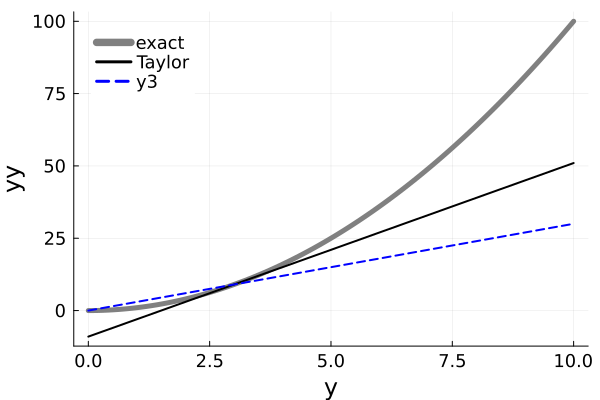

In [8]:
y = LinRange(0,10,100)

y0 = 3.
y2 = y.^2
y0y = y0 * y
yta = y0^2 .+ 2*y0*(y.-y0)

plt.resetfontsizes(); plt.scalefontsizes(1.5)
plt.plot( y,y2,  color="grey",  lw=5, label="exact")
plt.plot!(y,yta, color="black", lw=2, label="Taylor")
plt.plot!(y,y0y, color="blue",  lw=2, linestyle=:dash)
plt.plot!(xlabel="y", ylabel="yy", foreground_color_legend=nothing)

### Nonuniform grids
#### Method 1
* Set an arbitrary grid with arbitrary $\Delta x$ spacing between points.

```
 *     *                         * 
i-1    i                        i+1
```

* Let $\Delta x_{i-1} = x_i - x_{i-1}$, and $\Delta x_{i} = x_{i+1}-x_i$.
* Then a central difference approximation is 
$$f^{\prime}(x_i) = f_i^{\prime} \approx \frac{f_{i+1}-f_{i-1}}{\Delta x_{i-1} + \Delta x_i}.$$
    * A Taylor Series gives second order when $\Delta x_{i-1}=\Delta x_i$, but only first order when $\Delta x_{i-1}\ne \Delta x_i$.
        * These are second and first order **asymptotically** as $\Delta x\rightarrow 0$. 
        * In practice, accuracy is not severely compromized if $\Delta x_{i-1}$ is not too different from $\Delta x_i$.



* For a second derivative, we have
$$f^{\prime\prime}_i\approx \frac{\frac{f_{i+1}-f_i}{\Delta x_i}-\frac{f_i-f_{i-1}}{\Delta x_{i-1}}}{\frac{\Delta x_{i-1}+\Delta x_i}{2}}.$$
        

#### Method 2
* Stretch the grid **analytically**
* Let $x$ be the nonuniform grid and
* Let $\eta$ be a corresponding uniform grid.
* For example
$$\eta = \ln(x+1) \rightarrow x = e^{\eta} - 1.$$
<img src="https://ignite.byu.edu/che541/lectures/figs/l21_f01.png" width="200">



* Then 
    $$ \frac{dy}{dx} = \frac{dy}{d\eta}\frac{d\eta}{dx} = \frac{dy}{d\eta}\left(\frac{1}{x+1}\right).$$
    * This allows us to transform all the $dy/dx$ derivatives on the nonuniform grid to $dy/d\eta$ derivatives on a uniform grid times some known factor $1/(x+1)$ at any given point. 
    * So, if we are evaluating $dy/dx$ at point $i$, we would have 
    $$y^{\prime}_i = \frac{y_{i+1}-y_{i-1}}{\Delta \eta}\left(\frac{1}{x_i+1}\right).$$
* This works great, and is easy to use. 

### Questions
- What would you do to have an arbitrary grid spacing that is not defined by some known function?
- Could you develop a second order approximation to a central derivative on a nonuniform grid?